In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Tampermonkey autoscroll colab notebook
%%javascript

window.scroll_flag = true
window.scroll_exit = false
window.scroll_delay = 100

$(".output_scroll").each(function() {
    $(this)[0].scrollTop = $(this)[0].scrollHeight;
});

function callScrollToBottom() {
    setTimeout(scrollToBottom, window.scroll_delay);
}

function scrollToBottom() {
    if (window.scroll_exit) {
        return;
    }
    if (!window.scroll_flag) {
        callScrollToBottom();
        return;
    };
    
    $(".output_scroll").each(function() {
        if (!$(this).attr('scroll_checkbox')){
            window.scroll_flag = true;
            $(this).attr('scroll_checkbox',true);
            var div = document.createElement('div');
            var checkbox = document.createElement('input');
            checkbox.type = "checkbox";
            checkbox.onclick = function(){window.scroll_flag = checkbox.checked}
            checkbox.checked = "checked"
            div.append("Auto-Scroll-To-Bottom: ");
            div.append(checkbox);
            $(this).parent().before(div);
        }
        
        $(this)[0].scrollTop = $(this)[0].scrollHeight;
    });
    callScrollToBottom();
}
scrollToBottom();

<IPython.core.display.Javascript object>

In [ ]:
# CTRL + F10 HERE
#ou need to paste this script into the JavaScript console of the Colab browser window (Ctrl+Shift+i):
'''
function ClickConnect() {
  console.log('Working')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}

setInterval(ClickConnect, 60000)
'''
#

"\nfunction ClickConnect() {\n  console.log('Working')\n  document\n    .querySelector('#top-toolbar > colab-connect-button')\n    .shadowRoot.querySelector('#connect')\n    .click()\n}\n\nsetInterval(ClickConnect, 60000)\n"

In [ ]:
'''#GPU count and name
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi
#CPU
!lscpu |grep 'Model name'
#no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'
#no.of cores each processor is having 
!lscpu | grep 'Core(s) per socket:'
#no.of threads each core is having
!lscpu | grep 'Thread(s) per core'
#L3 cache
!lscpu | grep "L3 cache" 
#if it had turbo boost it would've shown Min and Max MHz also but it is only showing current frequency this means it always operates at shown frequency
!lscpu | grep "MHz"
#memory that we can use
!free -h --si | awk  '/Mem:/{print $2}'
#hard disk space that we can use
!df -h / | awk '{print $4}'
'''
#
!apt-get install inxi -y
!inxi -F

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
#warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [ ]:
# http://dados.ufrn.br/dataset/turmas

path = '/content/drive/'+"MyDrive"+'/DataScience/Dados/';

# turmas dos 5 semestres
turmas_url_2018_02 = path+'turmas-2018.2.csv'
turmas_url_2019_02 = path+'turmas-2019.2.csv'
turmas_url_2018_01 = path+'turmas-2018.1.csv'
turmas_url_2019_01 = path+'turmas-2019.1.csv'
turmas_url_2020_01 = path+'turmas-2020.6.csv'

# matrículas em componentes dos 5 semestres
notas_url_2018_02 = path+'matricula-componente-20182.csv'
notas_url_2019_02 = path+'matricula-componente-20192.csv'
notas_url_2018_01 = path+'matricula-componente-20181.csv'
notas_url_2019_01 = path+'matricula-componente-20191.csv'
notas_url_2020_01 = path+'matricula-componente-20206.csv'

# componentes curriculares presenciais
disciplinas_url = path+'componentes-curriculares-presenciais.csv'

# docentes da ufrn
docentes_url = path+'docentes.csv'

turmas_2018_02 = pd.read_csv(turmas_url_2018_02, sep=';')
turmas_2019_02 = pd.read_csv(turmas_url_2019_02, sep=';')
turmas_2018_01 = pd.read_csv(turmas_url_2018_01, sep=';')
turmas_2019_01 = pd.read_csv(turmas_url_2019_01, sep=';')
turmas_2020_01 = pd.read_csv(turmas_url_2020_01, sep=';')

# matriculas em componentes em todas as disciplinas
notas_2018_02 = pd.read_csv(notas_url_2018_02, sep=';')
notas_2019_02 = pd.read_csv(notas_url_2019_02, sep=';')
notas_2018_01 = pd.read_csv(notas_url_2018_01, sep=';')
notas_2019_01 = pd.read_csv(notas_url_2019_01, sep=';')
notas_2020_01 = pd.read_csv(notas_url_2020_01, sep=';')

# failsafe dropna
'''
turmas_2018_01 = turmas_2018_01.dropna()
notas_2018_01 =  notas_2018_01.dropna()

turmas_2018_02 = turmas_2018_02.dropna()
notas_2018_02 =  notas_2018_02.dropna()

turmas_2019_01 = turmas_2019_01.dropna()
notas_2019_01 =  notas_2019_01.dropna()

turmas_2019_02 = turmas_2019_02.dropna()
notas_2019_02 =  notas_2019_02.dropna()

turmas_2020_01 = turmas_2020_01.dropna()
notas_2020_01 =  notas_2020_01.dropna()

'''

# componentes curriculares presenciais
# por alguma razão ou outra, esse dataset tinha algum lixo em linhas que ocasionava 
# erros de leitura, dessa forma foi realizado um filtro apenas por colunas mais importantes
disciplinas = pd.read_csv(disciplinas_url, 
                          sep=';', 
                          usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])

docentes = pd.read_csv(docentes_url, sep=';')

In [ ]:
# Adaptando o dataframe turma e disciplinas para o merge
# Esse procedimento é necessário pois o dataframe turma está codificado com ids

# A coluna id_componente precisa ser a mesma em ambos os dataframes
turmas_2018_02.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2019_02.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2018_01.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2019_01.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2020_01.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

# id_componente em ambos os dataframes precisam ser do mesmo tipo
turmas_2018_02.id_componente = turmas_2018_02.id_componente.astype(str)
turmas_2019_02.id_componente = turmas_2019_02.id_componente.astype(str)
turmas_2018_01.id_componente = turmas_2018_01.id_componente.astype(str)
turmas_2019_01.id_componente = turmas_2019_01.id_componente.astype(str)
turmas_2020_01.id_componente = turmas_2020_01.id_componente.astype(str)

disciplinas.id_componente = disciplinas.id_componente.astype(str)

# Limpando o dataframe disciplinas com linhas desnecessárias
disciplinas.dropna(inplace=True)
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]

In [ ]:
# Fazendo um merge entre o dataframe turmas e disciplinas utilizando como base a coluna id_componente
# https://pandas.pydata.org/pandas-docs/stable/merging.html
colunas = ["id_turma","siape","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario"]

# merge os dois dataframes utilizando como base a coluna id_componente
merge_turmas_disciplinas_2018_02 = pd.merge(turmas_2018_02, disciplinas, on='id_componente')[colunas]
merge_turmas_disciplinas_2019_02 = pd.merge(turmas_2019_02, disciplinas, on='id_componente')[colunas]
merge_turmas_disciplinas_2018_01 = pd.merge(turmas_2018_01, disciplinas, on='id_componente')[colunas]
merge_turmas_disciplinas_2019_01 = pd.merge(turmas_2019_01, disciplinas, on='id_componente')[colunas]
merge_turmas_disciplinas_2020_01 = pd.merge(turmas_2020_01, disciplinas, on='id_componente')[colunas]

merge_turmas_disciplinas_2018_02.dropna(inplace=True)
merge_turmas_disciplinas_2019_02.dropna(inplace=True)
merge_turmas_disciplinas_2018_01.dropna(inplace=True)
merge_turmas_disciplinas_2019_01.dropna(inplace=True)
merge_turmas_disciplinas_2020_01.dropna(inplace=True)

In [ ]:
# filtrando as turmas com código IMD
turmas_imd_2018_02 = merge_turmas_disciplinas_2018_02; #merge_turmas_disciplinas_2018_02[merge_turmas_disciplinas_2018_02.codigo.str.contains("IMD")]
turmas_imd_2019_02 = merge_turmas_disciplinas_2019_02; #merge_turmas_disciplinas_2019_02[merge_turmas_disciplinas_2019_02.codigo.str.contains("IMD")]
turmas_imd_2018_01 = merge_turmas_disciplinas_2018_01; #merge_turmas_disciplinas_2018_02[merge_turmas_disciplinas_2018_02.codigo.str.contains("IMD")]
turmas_imd_2019_01 = merge_turmas_disciplinas_2019_01; #merge_turmas_disciplinas_2019_02[merge_turmas_disciplinas_2019_02.codigo.str.contains("IMD")]
turmas_imd_2020_01 = merge_turmas_disciplinas_2020_01; #merge_turmas_disciplinas_2020_01[merge_turmas_disciplinas_2020_01.codigo.str.contains("IMD")]

# utilizar apenas disciplinas com código "CONSOLIDADA"
turmas_imd_2018_02 = turmas_imd_2018_02[turmas_imd_2018_02.situacao_turma == 'CONSOLIDADA'] 
turmas_imd_2019_02 = turmas_imd_2019_02[turmas_imd_2019_02.situacao_turma == 'CONSOLIDADA']
turmas_imd_2018_01 = turmas_imd_2018_01[turmas_imd_2018_01.situacao_turma == 'CONSOLIDADA'] 
turmas_imd_2019_01 = turmas_imd_2019_01[turmas_imd_2019_01.situacao_turma == 'CONSOLIDADA']
turmas_imd_2020_01 = turmas_imd_2020_01[turmas_imd_2020_01.situacao_turma == 'CONSOLIDADA']

# Adaptar o nome da coluna id_docente_interno para siape
turmas_imd_2018_02.rename(columns={'siape': 'siape'}, inplace=True)
turmas_imd_2019_02.rename(columns={'siape': 'siape'}, inplace=True)
turmas_imd_2018_01.rename(columns={'siape': 'siape'}, inplace=True)
turmas_imd_2019_01.rename(columns={'siape': 'siape'}, inplace=True)
turmas_imd_2020_01.rename(columns={'siape': 'siape'}, inplace=True)

turmas_imd_2018_02.capacidade_aluno = turmas_imd_2018_02.capacidade_aluno.astype(np.int64)
turmas_imd_2019_02.capacidade_aluno = turmas_imd_2019_02.capacidade_aluno.astype(np.int64)
turmas_imd_2018_01.capacidade_aluno = turmas_imd_2018_01.capacidade_aluno.astype(np.int64)
turmas_imd_2019_01.capacidade_aluno = turmas_imd_2019_01.capacidade_aluno.astype(np.int64)
turmas_imd_2020_01.capacidade_aluno = turmas_imd_2020_01.capacidade_aluno.astype(np.int64)
'''
# Adaptar os tipos de dados em turmas_imd para o merge com o dataframe docentes
turmas_imd_2018_02.siape = turmas_imd_2018_02.siape.astype(np.int64)
turmas_imd_2019_02.siape = turmas_imd_2019_02.siape.astype(np.int64)
turmas_imd_2018_01.siape = turmas_imd_2018_01.siape.astype(np.int64)
turmas_imd_2019_01.siape = turmas_imd_2019_01.siape.astype(np.int64)
turmas_imd_2020_01.siape = turmas_imd_2020_01.siape.astype(np.int64)
'''
#

'\n# Adaptar os tipos de dados em turmas_imd para o merge com o dataframe docentes\nturmas_imd_2018_02.siape = turmas_imd_2018_02.siape.astype(np.int64)\nturmas_imd_2019_02.siape = turmas_imd_2019_02.siape.astype(np.int64)\nturmas_imd_2018_01.siape = turmas_imd_2018_01.siape.astype(np.int64)\nturmas_imd_2019_01.siape = turmas_imd_2019_01.siape.astype(np.int64)\nturmas_imd_2020_01.siape = turmas_imd_2020_01.siape.astype(np.int64)\n'

In [ ]:
# merge os dataframes  turmas_imd e docentes utilizando como base a coluna id_servidor
colunas = ["id_turma", "nome_y", "codigo", "nivel_ensino",
          "nome_x","capacidade_aluno", "descricao_horario"]
turmas_imd_2018_02_nomesprof = pd.merge(turmas_imd_2018_02, docentes, on='siape')[colunas]
turmas_imd_2019_02_nomesprof = pd.merge(turmas_imd_2019_02, docentes, on='siape')[colunas]
turmas_imd_2018_01_nomesprof = pd.merge(turmas_imd_2018_01, docentes, on='siape')[colunas]
turmas_imd_2019_01_nomesprof = pd.merge(turmas_imd_2019_01, docentes, on='siape')[colunas]
turmas_imd_2020_01_nomesprof = pd.merge(turmas_imd_2020_01, docentes, on='siape')[colunas]

In [ ]:
# This is a checkpoint CTRL + F10 HERE

In [ ]:
notas_imd_2018_02 = notas_2018_02[notas_2018_02.id_turma.isin(turmas_imd_2018_02_nomesprof.id_turma)]
notas_imd_2019_02 = notas_2019_02[notas_2019_02.id_turma.isin(turmas_imd_2019_02_nomesprof.id_turma)]
notas_imd_2018_01 = notas_2018_01[notas_2018_01.id_turma.isin(turmas_imd_2018_01_nomesprof.id_turma)]
notas_imd_2019_01 = notas_2019_01[notas_2019_01.id_turma.isin(turmas_imd_2019_01_nomesprof.id_turma)]
notas_imd_2020_01 = notas_2020_01[notas_2020_01.id_turma.isin(turmas_imd_2020_01_nomesprof.id_turma)]

# merge entre os dataframes notas_imd e turmas_imd_nomesprof utilizando como referencia id_turma
notas_imd_2018_02_merge = pd.merge(notas_imd_2018_02, turmas_imd_2018_02_nomesprof, on='id_turma')
notas_imd_2019_02_merge = pd.merge(notas_imd_2019_02, turmas_imd_2019_02_nomesprof, on='id_turma')
notas_imd_2018_01_merge = pd.merge(notas_imd_2018_01, turmas_imd_2018_01_nomesprof, on='id_turma')
notas_imd_2019_01_merge = pd.merge(notas_imd_2019_01, turmas_imd_2019_01_nomesprof, on='id_turma')
notas_imd_2020_01_merge = pd.merge(notas_imd_2020_01, turmas_imd_2020_01_nomesprof, on='id_turma')


In [ ]:
notas_imd_2018_01_merge = notas_imd_2018_01_merge.replace({',': '.'}, regex=True)
notas_imd_2018_01_merge.nota = notas_imd_2018_01_merge.nota.astype(np.float64)
notas_imd_2018_01_merge.media_final = notas_imd_2018_01_merge.media_final.astype(np.float64)
notas_imd_2018_01_merge.id_curso = notas_imd_2018_01_merge.id_curso.fillna(0).astype(np.ushort)
notas_imd_2018_01_merge.unidade = notas_imd_2018_01_merge.unidade.fillna(0).astype(np.ushort)
notas_imd_2018_01_merge.faltas_unidade = notas_imd_2018_01_merge.faltas_unidade.fillna(0).astype(np.ushort)
notas_imd_2018_01_merge.numero_total_faltas = notas_imd_2018_01_merge.numero_total_faltas.fillna(0).astype(np.ushort)
notas_imd_2018_01_merge.capacidade_aluno = notas_imd_2018_01_merge.capacidade_aluno.fillna(0).astype(np.ushort)
notas_imd_2018_01_merge.id_turma = notas_imd_2018_01_merge.id_turma.fillna(0).astype(np.ushort)

notas_imd_2018_02_merge = notas_imd_2018_02_merge.replace({',': '.'}, regex=True)
notas_imd_2018_02_merge.nota = notas_imd_2018_02_merge.nota.astype(np.float64)
notas_imd_2018_02_merge.media_final = notas_imd_2018_02_merge.media_final.astype(np.float64)
notas_imd_2018_02_merge.id_curso = notas_imd_2018_02_merge.id_curso.fillna(0).astype(np.ushort)
notas_imd_2018_02_merge.unidade = notas_imd_2018_02_merge.unidade.fillna(0).astype(np.ushort)
notas_imd_2018_02_merge.faltas_unidade = notas_imd_2018_02_merge.faltas_unidade.fillna(0).astype(np.ushort)
notas_imd_2018_02_merge.numero_total_faltas = notas_imd_2018_02_merge.numero_total_faltas.fillna(0).astype(np.ushort)
notas_imd_2018_02_merge.capacidade_aluno = notas_imd_2018_02_merge.capacidade_aluno.fillna(0).astype(np.ushort)
notas_imd_2018_02_merge.id_turma = notas_imd_2018_02_merge.id_turma.fillna(0).astype(np.ushort)

notas_imd_2019_01_merge = notas_imd_2019_01_merge.replace({',': '.'}, regex=True)
notas_imd_2019_01_merge.nota = notas_imd_2019_01_merge.nota.astype(np.float64)
notas_imd_2019_01_merge.media_final = notas_imd_2019_01_merge.media_final.astype(np.float64)
notas_imd_2019_01_merge.id_curso = notas_imd_2019_01_merge.id_curso.fillna(0).astype(np.ushort)
notas_imd_2019_01_merge.unidade = notas_imd_2019_01_merge.unidade.fillna(0).astype(np.ushort)
notas_imd_2019_01_merge.faltas_unidade = notas_imd_2019_01_merge.faltas_unidade.fillna(0).astype(np.ushort)
notas_imd_2019_01_merge.numero_total_faltas = notas_imd_2019_01_merge.numero_total_faltas.fillna(0).astype(np.ushort)
notas_imd_2019_01_merge.capacidade_aluno = notas_imd_2019_01_merge.capacidade_aluno.fillna(0).astype(np.ushort)
notas_imd_2019_01_merge.id_turma = notas_imd_2019_01_merge.id_turma.fillna(0).astype(np.ushort)

notas_imd_2019_02_merge = notas_imd_2019_02_merge.replace({',': '.'}, regex=True)
notas_imd_2019_02_merge.nota = notas_imd_2019_02_merge.nota.astype(np.float64)
notas_imd_2019_02_merge.media_final = notas_imd_2019_02_merge.media_final.astype(np.float64)
notas_imd_2019_02_merge.id_curso = notas_imd_2019_02_merge.id_curso.fillna(0).astype(np.ushort)
notas_imd_2019_02_merge.unidade = notas_imd_2019_02_merge.unidade.fillna(0).astype(np.ushort)
notas_imd_2019_02_merge.faltas_unidade = notas_imd_2019_02_merge.faltas_unidade.fillna(0).astype(np.ushort)
notas_imd_2019_02_merge.numero_total_faltas = notas_imd_2019_02_merge.numero_total_faltas.fillna(0).astype(np.ushort)
notas_imd_2019_02_merge.capacidade_aluno = notas_imd_2019_02_merge.capacidade_aluno.fillna(0).astype(np.ushort)
notas_imd_2019_02_merge.id_turma = notas_imd_2019_02_merge.id_turma.fillna(0).astype(np.ushort)

notas_imd_2020_01_merge = notas_imd_2020_01_merge.replace({',': '.'}, regex=True)
notas_imd_2020_01_merge.nota = notas_imd_2020_01_merge.nota.astype(np.float64)
notas_imd_2020_01_merge.media_final = notas_imd_2020_01_merge.media_final.astype(np.float64)
notas_imd_2020_01_merge.id_curso = notas_imd_2020_01_merge.id_curso.fillna(0).astype(np.ushort)
notas_imd_2020_01_merge.unidade = notas_imd_2020_01_merge.unidade.fillna(0).astype(np.ushort)
notas_imd_2020_01_merge.faltas_unidade = notas_imd_2020_01_merge.faltas_unidade.fillna(0).astype(np.ushort)
notas_imd_2020_01_merge.numero_total_faltas = notas_imd_2020_01_merge.numero_total_faltas.fillna(0).astype(np.ushort)
notas_imd_2020_01_merge.capacidade_aluno = notas_imd_2020_01_merge.capacidade_aluno.fillna(0).astype(np.ushort)
notas_imd_2020_01_merge.id_turma = notas_imd_2020_01_merge.id_turma.fillna(0).astype(np.ushort)


In [ ]:
def aprovado(row):
    if row["descricao"] == "APROVADO" or row["descricao"] == "APROVADO POR NOTA":
        return True
    else:
        return False

In [ ]:
def reprovadoporfalta(row):
    if row["descricao"] == "REPROVADO POR FALTAS" or row["descricao"] == "REPROVADO POR NOTA E FALTA" or row["descricao"] == "REPROVADO POR MÉDIA E POR FALTAS":
        return True
    else:
        return False

In [ ]:
def reposicao(row):
    if row["reposicao"] == "True":
        return True
    else:
        return False

In [ ]:
def matematicamentereprovado(row):
  if row["aprovado"] == 0:
    if row["media_final"] < 5:
      if row["reprovadoporfalta"] == True:
        return True;
        # ele tem que sair
      else:
        return False;
    else:
      return False;
  else:
    return False;

In [ ]:
# Colocando uma flag nos alunos aprovados
rotulos_2018_02 = notas_imd_2018_02_merge.apply(aprovado, axis = 1)
notas_imd_2018_02_merge["aprovado"] = rotulos_2018_02
rotulos_2019_02 = notas_imd_2019_02_merge.apply(aprovado, axis = 1)
notas_imd_2019_02_merge["aprovado"] = rotulos_2019_02
rotulos_2018_01 = notas_imd_2018_01_merge.apply(aprovado, axis = 1)
notas_imd_2018_01_merge["aprovado"] = rotulos_2018_01
rotulos_2019_01 = notas_imd_2019_01_merge.apply(aprovado, axis = 1)
notas_imd_2019_01_merge["aprovado"] = rotulos_2019_01
rotulos_2020_01 = notas_imd_2020_01_merge.apply(aprovado, axis = 1)
notas_imd_2020_01_merge["aprovado"] = rotulos_2020_01

In [ ]:
# Colocando uma flag nos alunos reprovados por falta
rotulos_2018_02 = notas_imd_2018_02_merge.apply(reprovadoporfalta, axis = 1)
notas_imd_2018_02_merge["reprovadoporfalta"] = rotulos_2018_02
rotulos_2019_02 = notas_imd_2019_02_merge.apply(reprovadoporfalta, axis = 1)
notas_imd_2019_02_merge["reprovadoporfalta"] = rotulos_2019_02
rotulos_2018_01 = notas_imd_2018_01_merge.apply(reprovadoporfalta, axis = 1)
notas_imd_2018_01_merge["reprovadoporfalta"] = rotulos_2018_01
rotulos_2019_01 = notas_imd_2019_01_merge.apply(reprovadoporfalta, axis = 1)
notas_imd_2019_01_merge["reprovadoporfalta"] = rotulos_2019_01
rotulos_2020_01 = notas_imd_2020_01_merge.apply(reprovadoporfalta, axis = 1)
notas_imd_2020_01_merge["reprovadoporfalta"] = rotulos_2020_01

In [ ]:
# Corrigindo o tipo da coluna reposicao
rotulos_2018_02 = notas_imd_2018_02_merge.apply(reposicao, axis = 1)
notas_imd_2018_02_merge["reposicao"] = rotulos_2018_02
rotulos_2019_02 = notas_imd_2019_02_merge.apply(reposicao, axis = 1)
notas_imd_2019_02_merge["reposicao"] = rotulos_2019_02
rotulos_2018_01 = notas_imd_2018_01_merge.apply(reposicao, axis = 1)
notas_imd_2018_01_merge["reposicao"] = rotulos_2018_01
rotulos_2019_01 = notas_imd_2019_01_merge.apply(reposicao, axis = 1)
notas_imd_2019_01_merge["reposicao"] = rotulos_2019_01
rotulos_2020_01 = notas_imd_2020_01_merge.apply(reposicao, axis = 1)
notas_imd_2020_01_merge["reposicao"] = rotulos_2020_01

In [ ]:
# Checkpoint CTRL + F10 HERE

In [ ]:
notas_imd_2018_02_merge['semestre'] = '2018.2'
notas_imd_2019_02_merge['semestre'] = '2019.2'
notas_imd_2018_01_merge['semestre'] = '2018.1'
notas_imd_2019_01_merge['semestre'] = '2019.1'
notas_imd_2020_01_merge['semestre'] = '2020.1'

df = pd.concat([notas_imd_2018_01_merge, notas_imd_2018_02_merge, notas_imd_2019_01_merge, notas_imd_2019_02_merge, notas_imd_2020_01_merge], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8537789 entries, 0 to 8537788
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id_turma             uint16 
 1   discente             object 
 2   id_curso             uint16 
 3   unidade              uint16 
 4   nota                 float64
 5   reposicao            bool   
 6   faltas_unidade       uint16 
 7   media_final          float64
 8   numero_total_faltas  uint16 
 9   descricao            object 
 10  nome_y               object 
 11  codigo               object 
 12  nivel_ensino         object 
 13  nome_x               object 
 14  capacidade_aluno     uint16 
 15  descricao_horario    object 
 16  aprovado             bool   
 17  reprovadoporfalta    bool   
 18  semestre             object 
dtypes: bool(3), float64(2), object(8), uint16(6)
memory usage: 773.5+ MB


In [ ]:
df.size

162217991

In [ ]:
df = df.dropna()
df = df.drop_duplicates()

In [ ]:
df.reset_index(drop=True, inplace=True)
df = df.drop_duplicates()

In [ ]:
df.size

37061153

In [ ]:
df.head()

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,nome_y,codigo,nivel_ensino,nome_x,capacidade_aluno,descricao_horario,aprovado,reprovadoporfalta,semestre
0,9902,46f9540cc15333e6ec97dfd8e69120a5,33991,1,0.0,False,0,0.0,0,REPROVADO,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,False,False,2018.1
1,9902,46f9540cc15333e6ec97dfd8e69120a5,33991,2,0.0,False,0,0.0,0,REPROVADO,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,False,False,2018.1
2,9902,46f9540cc15333e6ec97dfd8e69120a5,33991,3,0.0,False,0,0.0,0,REPROVADO,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,False,False,2018.1
3,9902,3262b83ba62aeec3d08f1a926afb52d5,33991,1,9.0,False,0,5.8,0,REPROVADO POR NOTA,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,False,False,2018.1
4,9902,3262b83ba62aeec3d08f1a926afb52d5,33991,2,7.0,False,0,5.8,0,REPROVADO POR NOTA,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,False,False,2018.1


In [ ]:
aux = df
df = aux.rename(columns = {'nome_y' : 'docente', 'nome_x' : 'disciplina'})

In [ ]:
dfc = df[['discente', 'unidade', 'nota', 'media_final','aprovado', 'reposicao', 'reprovadoporfalta', 'numero_total_faltas', 'descricao','nivel_ensino', 'id_turma', 'codigo', 'disciplina', 'docente','semestre']]
dfc.head()

,discente,unidade,nota,media_final,aprovado,reposicao,reprovadoporfalta,numero_total_faltas,descricao,nivel_ensino,id_turma,codigo,disciplina,docente,semestre
0,46f9540cc15333e6ec97dfd8e69120a5,1,0.0,0.0,False,False,False,0,REPROVADO,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1
1,46f9540cc15333e6ec97dfd8e69120a5,2,0.0,0.0,False,False,False,0,REPROVADO,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1
2,46f9540cc15333e6ec97dfd8e69120a5,3,0.0,0.0,False,False,False,0,REPROVADO,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1
3,3262b83ba62aeec3d08f1a926afb52d5,1,9.0,5.8,False,False,False,0,REPROVADO POR NOTA,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1
4,3262b83ba62aeec3d08f1a926afb52d5,2,7.0,5.8,False,False,False,0,REPROVADO POR NOTA,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1


In [ ]:
dfc.size

29258805

In [ ]:
#dfc = dfc[dfc.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]

In [ ]:
dfc.descricao.unique()

array(['REPROVADO', 'REPROVADO POR NOTA', 'APROVADO',
       'REPROVADO POR MÉDIA E POR FALTAS', 'APROVADO POR NOTA',
       'CANCELADO', 'REPROVADO POR FALTAS', 'EXCLUIDA',
       'REPROVADO POR NOTA E FALTA', 'TRANCADO', 'DESISTENCIA',
       'DISPENSADO', 'EM ESPERA', 'CUMPRIU', 'AGUARDANDO DEFERIMENTO'],
      dtype=object)

In [ ]:
dfc.size

29258805

In [ ]:
# Fim de tratamento e limpeza, início de recorte e seleção

In [ ]:
dfc = dfc[dfc["descricao"] != "INDEFERIDO"]
dfc = dfc[dfc["descricao"] != "EXCLUIDA"]
dfc = dfc[dfc["descricao"] != "TRANCADO"]
dfc = dfc[dfc["descricao"] != "CANCELADO"]
dfc = dfc[dfc["descricao"] != "DESISTENCIA"]
dfc = dfc[dfc["descricao"] != "AGUARDANDO DEFERIMENTO"]
dfc = dfc[dfc["descricao"] != "CUMPRIU"]
dfc = dfc[dfc["descricao"] != "EM ESPERA"]
dfc = dfc[dfc["descricao"] != "DISPENSADO"]

In [ ]:
dfc.descricao.unique()

array(['REPROVADO', 'REPROVADO POR NOTA', 'APROVADO',
       'REPROVADO POR MÉDIA E POR FALTAS', 'APROVADO POR NOTA',
       'REPROVADO POR FALTAS', 'REPROVADO POR NOTA E FALTA'], dtype=object)

In [ ]:
dfc = dfc[dfc["nivel_ensino"] == "GRADUAÇÃO"]

In [ ]:
dfc.to_csv("dfc.csv")

In [ ]:
pensamento_computacional = df
pensamento_computacional = pensamento_computacional.loc[pensamento_computacional['disciplina'] == 'PENSAMENTO COMPUTACIONAL']
pensamento_computacional = pensamento_computacional.loc[pensamento_computacional['semestre'] == '2020.1']
pensamento_computacional = pensamento_computacional[['id_turma', 'discente', 'unidade', 'nota', 'media_final','descricao', 'numero_total_faltas', 'disciplina','semestre']]
pensamento_computacional = pensamento_computacional.drop_duplicates()
pensamento_computacional.reset_index(drop=True, inplace=True)
pensamento_computacional = pensamento_computacional.drop_duplicates()
pensamento_computacional.head()

,id_turma,discente,unidade,nota,media_final,descricao,numero_total_faltas,disciplina,semestre
0,51700,777b47442f1c17f1217e165d5330c6c9,1,9.9,9.7,APROVADO,0,PENSAMENTO COMPUTACIONAL,2020.1
1,51700,777b47442f1c17f1217e165d5330c6c9,2,9.2,9.7,APROVADO,0,PENSAMENTO COMPUTACIONAL,2020.1
2,51700,777b47442f1c17f1217e165d5330c6c9,3,10.0,9.7,APROVADO,0,PENSAMENTO COMPUTACIONAL,2020.1
3,51700,b8f5bd626048153244976ce76718c4e2,3,0.0,0.5,REPROVADO POR MÉDIA E POR FALTAS,40,PENSAMENTO COMPUTACIONAL,2020.1
4,51700,b8f5bd626048153244976ce76718c4e2,1,1.5,0.5,REPROVADO POR MÉDIA E POR FALTAS,40,PENSAMENTO COMPUTACIONAL,2020.1


In [ ]:
pensamento_computacional.to_csv("pensamento_computacional.csv")

In [ ]:
pensamento_computacional.size

5373

In [ ]:
dfc.size

28251405

In [ ]:
filtrados = dfc
filtrados = filtrados.loc[filtrados['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
'''
rotulos_filtrados_2 = filtrados.apply(aprovado, axis = 1)
filtrados["aprovado"] = rotulos_filtrados_2
'''
rotulos_filtrados = filtrados.apply(matematicamentereprovado, axis = 1)
filtrados["reprovadomatematicamente"] = rotulos_filtrados

base_final = filtrados.loc[filtrados['reprovadomatematicamente'] == False]

In [ ]:
excluidos = filtrados.loc[filtrados['reprovadomatematicamente'] == True]

In [ ]:
excluidos.head()

,discente,unidade,nota,media_final,aprovado,reposicao,reprovadoporfalta,numero_total_faltas,descricao,nivel_ensino,id_turma,codigo,disciplina,docente,semestre,reprovadomatematicamente
152708,7448bbfeb9b87ec12bbb49b0c0e87e7d,1,0.0,0.0,False,False,True,55,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True
152709,7448bbfeb9b87ec12bbb49b0c0e87e7d,2,0.0,0.0,False,False,True,55,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True
152710,7448bbfeb9b87ec12bbb49b0c0e87e7d,3,0.0,0.0,False,False,True,55,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True
152810,22ef8004c7afa1b554755eb776c4dc69,1,8.9,3.9,False,False,True,48,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True
152811,22ef8004c7afa1b554755eb776c4dc69,2,2.9,3.9,False,False,True,48,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True


In [ ]:
excluidos.describe()

,unidade,nota,media_final,numero_total_faltas,id_turma
count,339.000000,339.000000,339.000000,339.000000,339.000000
mean,2.000000,1.039528,1.038938,57.584071,42310.017699
std,0.817704,1.781621,1.214515,18.998782,12447.209686
min,1.000000,0.000000,0.000000,18.000000,7902.000000
25%,1.000000,0.000000,0.000000,42.000000,33239.000000
50%,2.000000,0.000000,0.500000,60.000000,40050.000000
75%,3.000000,1.500000,1.700000,72.000000,54613.000000
max,3.000000,8.900000,4.300000,96.000000,58432.000000


In [ ]:
# linhas excluidas pela regra
excluidos.size

5424

In [ ]:
# discentes excluidos pela regra
excluidos[excluidos.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True].size

1696

In [ ]:
base_final.head()

,discente,unidade,nota,media_final,aprovado,reposicao,reprovadoporfalta,numero_total_faltas,descricao,nivel_ensino,id_turma,codigo,disciplina,docente,semestre,reprovadomatematicamente
152699,6de8a838aa97afbc920c26f719aeab50,1,4.5,7.2,True,False,False,10,APROVADO,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,False
152700,6de8a838aa97afbc920c26f719aeab50,2,10.0,7.2,True,False,False,10,APROVADO,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,False
152701,6de8a838aa97afbc920c26f719aeab50,3,7.0,7.2,True,False,False,10,APROVADO,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,False
152702,d638dffa503c3470874f0e5d8a8c502b,1,4.5,6.4,True,False,False,14,APROVADO POR NOTA,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,False
152703,d638dffa503c3470874f0e5d8a8c502b,2,7.6,6.4,True,False,False,14,APROVADO POR NOTA,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,False


In [ ]:
base_final.describe()

,unidade,nota,media_final,numero_total_faltas,id_turma
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,2.000000,5.913181,6.084122,9.671756,33908.914504
std,0.816704,3.157078,2.584889,9.742648,13080.850622
min,1.000000,0.000000,0.000000,0.000000,7902.000000
25%,1.000000,3.700000,5.000000,0.000000,22196.000000
50%,2.000000,6.400000,6.400000,8.000000,35639.000000
75%,3.000000,8.600000,7.900000,18.000000,40051.000000
max,3.000000,10.000000,10.000000,68.000000,58432.000000


In [ ]:
base_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 152699 to 1699991
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   discente                  1965 non-null   object 
 1   unidade                   1965 non-null   uint16 
 2   nota                      1965 non-null   float64
 3   media_final               1965 non-null   float64
 4   aprovado                  1965 non-null   bool   
 5   reposicao                 1965 non-null   bool   
 6   reprovadoporfalta         1965 non-null   bool   
 7   numero_total_faltas       1965 non-null   uint16 
 8   descricao                 1965 non-null   object 
 9   nivel_ensino              1965 non-null   object 
 10  id_turma                  1965 non-null   uint16 
 11  codigo                    1965 non-null   object 
 12  disciplina                1965 non-null   object 
 13  docente                   1965 non-null   object 
 14  

In [ ]:
base_final.to_csv("base_final.csv")

In [ ]:
# discentes na base final
base_final[base_final.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True].size

10048

In [ ]:
base_final.size

31440

In [ ]:
#Separando e tratando os alunos de graduação
graduacao_imd_2018_02 = notas_imd_2018_02_merge[notas_imd_2018_02_merge["nivel_ensino"] == "GRADUAÇÃO"]
graduacao_imd_2018_01 = notas_imd_2018_01_merge[notas_imd_2018_01_merge["nivel_ensino"] == "GRADUAÇÃO"]
graduacao_imd_2020_01 = notas_imd_2020_01_merge[notas_imd_2020_01_merge["nivel_ensino"] == "GRADUAÇÃO"]
graduacao_imd_2019_02 = notas_imd_2019_02_merge[notas_imd_2019_02_merge["nivel_ensino"] == "GRADUAÇÃO"]
graduacao_imd_2019_01 = notas_imd_2019_01_merge[notas_imd_2019_01_merge["nivel_ensino"] == "GRADUAÇÃO"]

In [ ]:
#Separando as turmas da disciplina de itp em cada semestre

graduacao_imd_2018_02 = graduacao_imd_2018_02.rename(columns = {'nome_y' : 'docente', 'nome_x' : 'disciplina'})
#graduacao_imd_2018_02.sort_values(ascending = True, by = ["id_turma", "discente","unidade"], inplace = True)
graduacao_imd_2018_02.sort_values(ascending = True, by = "discente", inplace = True)
graduacao_imd_2018_02.reset_index(inplace = True)
materias_2018_02 = graduacao_imd_2018_02.disciplina.unique()

graduacao_imd_2018_01 = graduacao_imd_2018_01.rename(columns = {'nome_y' : 'docente', 'nome_x' : 'disciplina'})
#graduacao_imd_2018_01.sort_values(ascending = True, by = ["id_turma", "discente","unidade"], inplace = True)
graduacao_imd_2018_01.sort_values(ascending = True, by = "discente", inplace = True)
graduacao_imd_2018_01.reset_index(inplace = True)
materias_2018_01 = graduacao_imd_2018_01.disciplina.unique()

graduacao_imd_2020_01 = graduacao_imd_2020_01.rename(columns = {'nome_y' : 'docente', 'nome_x' : 'disciplina'})
#graduacao_imd_2020_01.sort_values(ascending = True, by = ["id_turma", "discente","unidade"], inplace = True)
graduacao_imd_2020_01.sort_values(ascending = True, by = "discente", inplace = True)
graduacao_imd_2020_01.reset_index(inplace = True)
materias_2020_01 = graduacao_imd_2020_01.disciplina.unique()

graduacao_imd_2019_02 = graduacao_imd_2019_02.rename(columns = {'nome_y' : 'docente', 'nome_x' : 'disciplina'})
#graduacao_imd_2019_02.sort_values(ascending = True, by = ["id_turma", "discente","unidade"], inplace = True)
graduacao_imd_2019_02.sort_values(ascending = True, by = "discente", inplace = True)
graduacao_imd_2019_02.reset_index(inplace = True)
materias_2019_02 = graduacao_imd_2019_02.disciplina.unique()

graduacao_imd_2019_01 = graduacao_imd_2019_01.rename(columns = {'nome_y' : 'docente', 'nome_x' : 'disciplina'})
#graduacao_imd_2019_01.sort_values(ascending = True, by = ["id_turma", "discente","unidade"], inplace = True)
graduacao_imd_2019_01.sort_values(ascending = True, by = "discente", inplace = True)
graduacao_imd_2019_01.reset_index(inplace = True)
materias_2019_01 = graduacao_imd_2019_01.disciplina.unique()

graduacao_imd_2018_02 = graduacao_imd_2018_02.loc[graduacao_imd_2018_02['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
graduacao_imd_2018_01 = graduacao_imd_2018_01.loc[graduacao_imd_2018_01['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
graduacao_imd_2020_01 = graduacao_imd_2020_01.loc[graduacao_imd_2020_01['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
graduacao_imd_2019_02 = graduacao_imd_2019_02.loc[graduacao_imd_2019_02['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
graduacao_imd_2019_01 = graduacao_imd_2019_01.loc[graduacao_imd_2019_01['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']

graduacao_imd_2018_01 = graduacao_imd_2018_01.drop_duplicates()
graduacao_imd_2018_01.reset_index(drop=True, inplace=True)
graduacao_imd_2018_01 = graduacao_imd_2018_01.drop_duplicates()

graduacao_imd_2018_02 = graduacao_imd_2018_02.drop_duplicates()
graduacao_imd_2018_02.reset_index(drop=True, inplace=True)
graduacao_imd_2018_02 = graduacao_imd_2018_02.drop_duplicates()

graduacao_imd_2019_01 = graduacao_imd_2019_01.drop_duplicates()
graduacao_imd_2019_01.reset_index(drop=True, inplace=True)
graduacao_imd_2019_01 = graduacao_imd_2019_01.drop_duplicates()

graduacao_imd_2019_02 = graduacao_imd_2019_02.drop_duplicates()
graduacao_imd_2019_02.reset_index(drop=True, inplace=True)
graduacao_imd_2019_02 = graduacao_imd_2019_02.drop_duplicates()

graduacao_imd_2020_01 = graduacao_imd_2020_01.drop_duplicates()
graduacao_imd_2020_01.reset_index(drop=True, inplace=True)
graduacao_imd_2020_01 = graduacao_imd_2020_01.drop_duplicates()

In [ ]:
print('2018.1:', end =" ")
for codigo in graduacao_imd_2018_01.codigo.unique():
  print(codigo, end =" ")
print('\n')
print('2018.2:', end =" ")
for codigo in graduacao_imd_2018_02.codigo.unique():
  print(codigo, end =" ")
print('\n')
print('2019.1:', end =" ")
for codigo in graduacao_imd_2019_01.codigo.unique():
  print(codigo, end =" ")
print('\n')
print('2019.2:', end =" ")
for codigo in graduacao_imd_2019_02.codigo.unique():
  print(codigo, end =" ")
print('\n')
print('2020.1:', end =" ")
for codigo in graduacao_imd_2020_01.codigo.unique():
  print(codigo, end =" ")
print('\n')

2018.1: IMD0012.0 DIM0118.0 

2018.2: IMD0012.0 

2019.1: IMD1012 DIM0133 

2019.2: IMD1012 DIM0133 

2020.1: IMD1012 DIM0133 



In [ ]:
graduacao_imd_2018_02 = graduacao_imd_2018_02.replace({',': '.'}, regex=True)
graduacao_imd_2018_01 = graduacao_imd_2018_01.replace({',': '.'}, regex=True)
graduacao_imd_2020_01 = graduacao_imd_2020_01.replace({',': '.'}, regex=True)
graduacao_imd_2019_02 = graduacao_imd_2019_02.replace({',': '.'}, regex=True)
graduacao_imd_2019_01 = graduacao_imd_2019_01.replace({',': '.'}, regex=True)

graduacao_imd_2018_02.nota = graduacao_imd_2018_02.nota.astype(np.float64)
graduacao_imd_2018_01.nota = graduacao_imd_2018_01.nota.astype(np.float64)
graduacao_imd_2020_01.nota = graduacao_imd_2020_01.nota.astype(np.float64)
graduacao_imd_2019_02.nota = graduacao_imd_2019_02.nota.astype(np.float64)
graduacao_imd_2019_01.nota = graduacao_imd_2019_01.nota.astype(np.float64)

graduacao_imd_2018_02.media_final = graduacao_imd_2018_02.media_final.astype(np.float64)
graduacao_imd_2018_01.media_final = graduacao_imd_2018_01.media_final.astype(np.float64)
graduacao_imd_2020_01.media_final = graduacao_imd_2020_01.media_final.astype(np.float64)
graduacao_imd_2019_02.media_final = graduacao_imd_2019_02.media_final.astype(np.float64)
graduacao_imd_2019_01.media_final = graduacao_imd_2019_01.media_final.astype(np.float64)


Matrículas


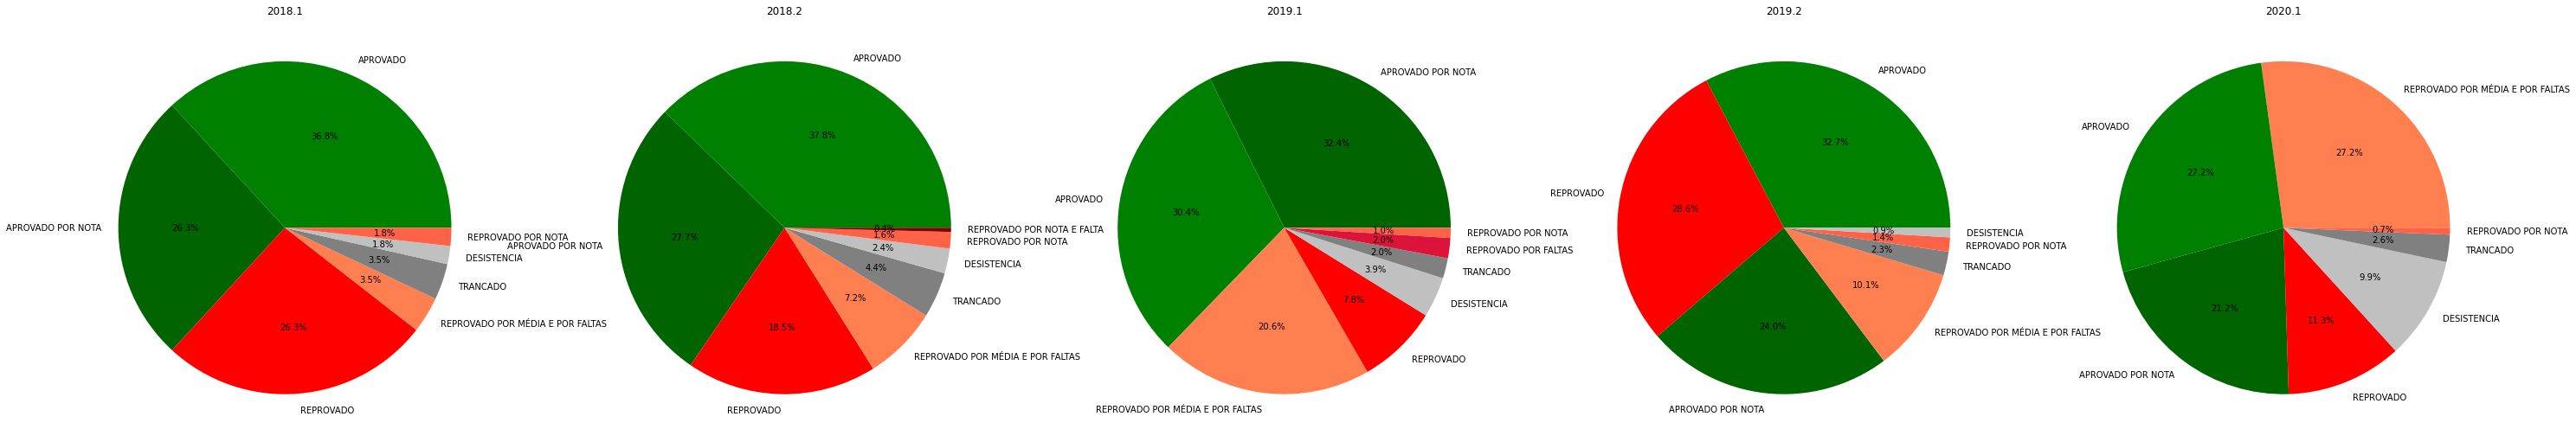

In [ ]:
fig = plt.figure(figsize=(50, 100));
labels = ['APROVADO' 'REPROVADO' 'APROVADO POR NOTA' 'REPROVADO POR NOTA' 
          'REPROVADO POR FALTAS' 'DESISTENCIA' 'REPROVADO POR MÉDIA E POR FALTAS'
          'REPROVADO POR NOTA E FALTA' 'TRANCADO']
'''
labels = ['APR' 'REP' 'APRN' 'REPN' 'REPF' 'DES' 'RPMF' 'RPNF' 'TRANC']
'''
columns_labels = {
    'APROVADO': 'green',
    'REPROVADO': 'red',
    'APROVADO POR NOTA': 'darkgreen',
    'REPROVADO POR NOTA': 'tomato',
    'REPROVADO POR FALTAS': 'crimson',
    'DESISTENCIA': 'silver',
    'REPROVADO POR MÉDIA E POR FALTAS': 'coral',
    'REPROVADO POR NOTA E FALTA': 'maroon',
    'TRANCADO': 'gray',
}


axx1 = plt.subplot(1, 5, 1);
pxxx1 = graduacao_imd_2018_01[graduacao_imd_2018_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxxx1 = pxxx1[pxxx1["descricao"] != "INDEFERIDO"]
pxxx1 = pxxx1[pxxx1["descricao"] != "EXCLUIDA"]
pxxx1 = pxxx1[pxxx1["descricao"] != "CANCELADO"]

pxxx1 = pxxx1.descricao.value_counts()
plt.title('2018.1');
pxxx1.plot(kind='pie', autopct='%1.1f%%', label='', colors=[columns_labels[v] for v in pxxx1.keys()])


axx4 = plt.subplot(1, 5, 2);
pxxx4 = graduacao_imd_2018_02[graduacao_imd_2018_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxxx4 = pxxx4[pxxx4["descricao"] != "INDEFERIDO"]
pxxx4 = pxxx4[pxxx4["descricao"] != "EXCLUIDA"]
pxxx4 = pxxx4[pxxx4["descricao"] != "CANCELADO"]

pxxx4 = pxxx4.descricao.value_counts()
plt.title('2018.2');
pxxx4.plot(kind='pie', autopct='%1.1f%%', label='', colors=[columns_labels[v] for v in pxxx4.keys()])


axx2 = plt.subplot(1, 5, 3);
pxxx2 = graduacao_imd_2019_01[graduacao_imd_2019_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxxx2 = pxxx2[pxxx2["descricao"] != "INDEFERIDO"]
pxxx2 = pxxx2[pxxx2["descricao"] != "EXCLUIDA"]
pxxx2 = pxxx2[pxxx2["descricao"] != "CANCELADO"]

pxxx2 = pxxx2.descricao.value_counts()
plt.title('2019.1');
pxxx2.plot(kind='pie', autopct='%1.1f%%', label='', colors=[columns_labels[v] for v in pxxx2.keys()])


axx5 = plt.subplot(1, 5, 4);
pxxx5 = graduacao_imd_2019_02[graduacao_imd_2019_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxxx5 = pxxx5[pxxx5["descricao"] != "INDEFERIDO"]
pxxx5 = pxxx5[pxxx5["descricao"] != "EXCLUIDA"]
pxxx5 = pxxx5[pxxx5["descricao"] != "CANCELADO"]

pxxx5 = pxxx5.descricao.value_counts()
plt.title('2019.2');
pxxx5.plot(kind='pie', autopct='%1.1f%%', label='', colors=[columns_labels[v] for v in pxxx5.keys()])


axx3 = plt.subplot(1, 5, 5);
pxxx3 = graduacao_imd_2020_01[graduacao_imd_2020_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxxx3 = pxxx3[pxxx3["descricao"] != "INDEFERIDO"]
pxxx3 = pxxx3[pxxx3["descricao"] != "EXCLUIDA"]
pxxx3 = pxxx3[pxxx3["descricao"] != "CANCELADO"]

plt.title('2020.1');
pxxx3 = pxxx3.descricao.value_counts()
pxxx3.plot(kind='pie', autopct='%1.1f%%', label='', colors=[columns_labels[v] for v in pxxx3.keys()])

print('Matrículas')

In [ ]:
graduacao_imd_2018_01 = graduacao_imd_2018_01.loc[graduacao_imd_2018_01['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
graduacao_imd_2018_01 = graduacao_imd_2018_01.loc[graduacao_imd_2018_01["descricao"] != "INDEFERIDO"]
graduacao_imd_2018_01 = graduacao_imd_2018_01.loc[graduacao_imd_2018_01["descricao"] != "DESISTENCIA"]
graduacao_imd_2018_01 = graduacao_imd_2018_01.loc[graduacao_imd_2018_01["descricao"] != "EXCLUIDA"]
graduacao_imd_2018_01 = graduacao_imd_2018_01.loc[graduacao_imd_2018_01["descricao"] != "CANCELADO"]
graduacao_imd_2018_01 = graduacao_imd_2018_01.loc[graduacao_imd_2018_01["descricao"] != "TRANCADO"]
rotulos_1 = graduacao_imd_2018_01.apply(matematicamentereprovado, axis = 1)
graduacao_imd_2018_01["reprovadomatematicamente"] = rotulos_1
graduacao_imd_2018_01 = graduacao_imd_2018_01.loc[graduacao_imd_2018_01['reprovadomatematicamente'] == False]


graduacao_imd_2018_02 = graduacao_imd_2018_02.loc[graduacao_imd_2018_02['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
graduacao_imd_2018_02 = graduacao_imd_2018_02.loc[graduacao_imd_2018_02["descricao"] != "INDEFERIDO"]
graduacao_imd_2018_02 = graduacao_imd_2018_02.loc[graduacao_imd_2018_02["descricao"] != "DESISTENCIA"]
graduacao_imd_2018_02 = graduacao_imd_2018_02.loc[graduacao_imd_2018_02["descricao"] != "EXCLUIDA"]
graduacao_imd_2018_02 = graduacao_imd_2018_02.loc[graduacao_imd_2018_02["descricao"] != "CANCELADO"]
graduacao_imd_2018_02 = graduacao_imd_2018_02.loc[graduacao_imd_2018_02["descricao"] != "TRANCADO"]
rotulos_2 = graduacao_imd_2018_02.apply(matematicamentereprovado, axis = 1)
graduacao_imd_2018_02["reprovadomatematicamente"] = rotulos_2
graduacao_imd_2018_02 = graduacao_imd_2018_02.loc[graduacao_imd_2018_02['reprovadomatematicamente'] == False]


graduacao_imd_2019_01 = graduacao_imd_2019_01.loc[graduacao_imd_2019_01['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
graduacao_imd_2019_01 = graduacao_imd_2019_01.loc[graduacao_imd_2019_01["descricao"] != "INDEFERIDO"]
graduacao_imd_2019_01 = graduacao_imd_2019_01.loc[graduacao_imd_2019_01["descricao"] != "DESISTENCIA"]
graduacao_imd_2019_01 = graduacao_imd_2019_01.loc[graduacao_imd_2019_01["descricao"] != "EXCLUIDA"]
graduacao_imd_2019_01 = graduacao_imd_2019_01.loc[graduacao_imd_2019_01["descricao"] != "CANCELADO"]
graduacao_imd_2019_01 = graduacao_imd_2019_01.loc[graduacao_imd_2019_01["descricao"] != "TRANCADO"]
rotulos_3 = graduacao_imd_2019_01.apply(matematicamentereprovado, axis = 1)
graduacao_imd_2019_01["reprovadomatematicamente"] = rotulos_3
graduacao_imd_2019_01 = graduacao_imd_2019_01.loc[graduacao_imd_2019_01['reprovadomatematicamente'] == False]

graduacao_imd_2019_02 = graduacao_imd_2019_02.loc[graduacao_imd_2019_02['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
graduacao_imd_2019_02 = graduacao_imd_2019_02.loc[graduacao_imd_2019_02["descricao"] != "INDEFERIDO"]
graduacao_imd_2019_02 = graduacao_imd_2019_02.loc[graduacao_imd_2019_02["descricao"] != "DESISTENCIA"]
graduacao_imd_2019_02 = graduacao_imd_2019_02.loc[graduacao_imd_2019_02["descricao"] != "EXCLUIDA"]
graduacao_imd_2019_02 = graduacao_imd_2019_02.loc[graduacao_imd_2019_02["descricao"] != "CANCELADO"]
graduacao_imd_2019_02 = graduacao_imd_2019_02.loc[graduacao_imd_2019_02["descricao"] != "TRANCADO"]
rotulos_4 = graduacao_imd_2019_02.apply(matematicamentereprovado, axis = 1)
graduacao_imd_2019_02["reprovadomatematicamente"] = rotulos_4
graduacao_imd_2019_02 = graduacao_imd_2019_02.loc[graduacao_imd_2019_02['reprovadomatematicamente'] == False]

graduacao_imd_2020_01 = graduacao_imd_2020_01.loc[graduacao_imd_2020_01['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
graduacao_imd_2020_01 = graduacao_imd_2020_01.loc[graduacao_imd_2020_01["descricao"] != "INDEFERIDO"]
graduacao_imd_2020_01 = graduacao_imd_2020_01.loc[graduacao_imd_2020_01["descricao"] != "DESISTENCIA"]
graduacao_imd_2020_01 = graduacao_imd_2020_01.loc[graduacao_imd_2020_01["descricao"] != "EXCLUIDA"]
graduacao_imd_2020_01 = graduacao_imd_2020_01.loc[graduacao_imd_2020_01["descricao"] != "CANCELADO"]
graduacao_imd_2020_01 = graduacao_imd_2020_01.loc[graduacao_imd_2020_01["descricao"] != "TRANCADO"]
rotulos_5 = graduacao_imd_2020_01.apply(matematicamentereprovado, axis = 1)
graduacao_imd_2020_01["reprovadomatematicamente"] = rotulos_5
graduacao_imd_2020_01 = graduacao_imd_2020_01.loc[graduacao_imd_2020_01['reprovadomatematicamente'] == False]

graduacao_imd_2018_02.descricao.unique()

array(['APROVADO', 'REPROVADO POR NOTA', 'APROVADO POR NOTA', 'REPROVADO',
       'REPROVADO POR NOTA E FALTA'], dtype=object)

In [ ]:
#Realizando os cálculos da taxa de aprovação de cada um dos semestres
itp_2018_01 = graduacao_imd_2018_01[graduacao_imd_2018_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2018_01 = itp_2018_01.pivot_table(index = ["disciplina"], values = "aprovado", aggfunc = np.sum)
quantidade_alunos = itp_2018_01.pivot_table(index = "disciplina", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2018_01.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2018_01.aprovado = percent

itp_2018_02 = graduacao_imd_2018_02[graduacao_imd_2018_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2018_02 = itp_2018_02.pivot_table(index = ["disciplina"], values = "aprovado", aggfunc = np.sum)
quantidade_alunos = itp_2018_02.pivot_table(index = "disciplina", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2018_02.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2018_02.aprovado = percent

itp_2019_01 = graduacao_imd_2019_01[graduacao_imd_2019_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2019_01 = itp_2019_01.pivot_table(index = ["disciplina"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = itp_2019_01.pivot_table(index = "disciplina", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2019_01.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2019_01.aprovado = percent

itp_2019_02 = graduacao_imd_2019_02[graduacao_imd_2019_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2019_02 = itp_2019_02.pivot_table(index = ["disciplina"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = itp_2019_02.pivot_table(index = "disciplina", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2019_02.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2019_02.aprovado = percent

itp_2020_01 = graduacao_imd_2020_01[graduacao_imd_2020_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2020_01 = itp_2020_01.pivot_table(index = ["disciplina"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = itp_2020_01.pivot_table(index = "disciplina", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2020_01.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2020_01.aprovado = percent


In [ ]:
#Realizando os cálculos da taxa de aprovação por horário
itp_2018_01 = graduacao_imd_2018_01[graduacao_imd_2018_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2018_01_horario = itp_2018_01.pivot_table(index = ["descricao_horario"], values = "aprovado", aggfunc = np.sum)
quantidade_alunos = itp_2018_01.pivot_table(index = "descricao_horario", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2018_01_horario.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2018_01_horario.aprovado = percent

itp_2018_02 = graduacao_imd_2018_02[graduacao_imd_2018_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2018_02_horario = itp_2018_02.pivot_table(index = ["descricao_horario"], values = "aprovado", aggfunc = np.sum)
quantidade_alunos = itp_2018_02.pivot_table(index = "descricao_horario", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2018_02_horario.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2018_02_horario.aprovado = percent

itp_2019_01 = graduacao_imd_2019_01[graduacao_imd_2019_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2019_01_horario = itp_2019_01.pivot_table(index = ["descricao_horario"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = itp_2019_01.pivot_table(index = "descricao_horario", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2019_01_horario.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2019_01_horario.aprovado = percent

itp_2019_02 = graduacao_imd_2019_02[graduacao_imd_2019_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2019_02_horario = itp_2019_02.pivot_table(index = ["descricao_horario"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = itp_2019_02.pivot_table(index = "descricao_horario", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2019_02_horario.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2019_02_horario.aprovado = percent

itp_2020_01 = graduacao_imd_2020_01[graduacao_imd_2020_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
aprovados_itp_2020_01_horario = itp_2020_01.pivot_table(index = ["descricao_horario"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = itp_2020_01.pivot_table(index = "descricao_horario", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_itp_2020_01_horario.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_itp_2020_01_horario.aprovado = percent

In [ ]:
medias_por_semestre = []

p1 = graduacao_imd_2018_01[graduacao_imd_2018_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
p1 = pd.DataFrame(p1,columns = ['id_turma', 'discente','media_final'])
p1 = p1[p1['media_final'].notna()]
sum = 0;
for nota in p1.media_final:
  sum += float(nota);
mean = sum / p1.media_final.size
medias_por_semestre.append(mean)


p2 = graduacao_imd_2018_02[graduacao_imd_2018_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
p2 = pd.DataFrame(p2,columns = ['id_turma', 'discente','media_final'])
p2 = p2[p2['media_final'].notna()]
sum = 0;
for nota in p2.media_final:
  sum += float(nota);
mean = sum / p2.media_final.size
medias_por_semestre.append(mean)


p6 = graduacao_imd_2019_02[graduacao_imd_2019_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
#itp_2018_02 = itp_2018_02.pivot_table(index = ["id_turma"])
p6 = pd.DataFrame(p6,columns = ['id_turma', 'discente','media_final'])
p6 = p6[p6['media_final'].notna()]
sum = 0;
for nota in p6.media_final:
  sum += float(nota);
mean = sum / p6.media_final.size
medias_por_semestre.append(mean)


p3 = graduacao_imd_2019_02[graduacao_imd_2019_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
#itp_2018_02 = itp_2018_02.pivot_table(index = ["id_turma"])
p3 = pd.DataFrame(p3,columns = ['id_turma', 'discente','media_final'])
p3 = p3[p3['media_final'].notna()]
sum = 0;
for nota in p3.media_final:
  sum += float(nota);
mean = sum / p3.media_final.size
medias_por_semestre.append(mean)


p5 = graduacao_imd_2020_01[graduacao_imd_2020_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
p5 = pd.DataFrame(p5,columns = ['id_turma', 'discente','media_final'])
p5 = p5[p5['media_final'].notna()]
sum = 0;
for nota in p5.media_final:
  sum += float(nota);
mean = sum / p5.media_final.size
medias_por_semestre.append(mean)


p4 = pd.DataFrame(graduacao_imd_2018_02,columns = ['id_turma', 'discente','media_final'])

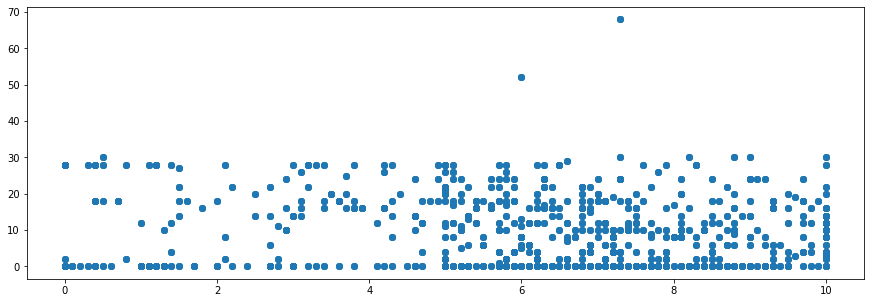

In [ ]:
fig = plt.figure(figsize=(15, 5));

frames = [graduacao_imd_2018_01, graduacao_imd_2018_02, graduacao_imd_2019_01, graduacao_imd_2019_02, graduacao_imd_2020_01] 
result = pd.concat(frames)
plt.scatter(result.media_final, result.numero_total_faltas)

Aprovação/Reprovação por semestre


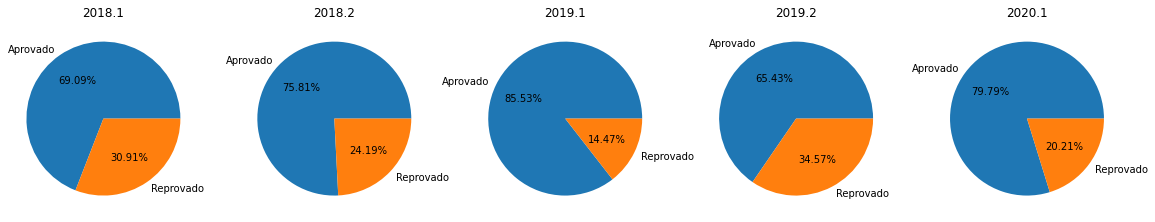

Aprovação por turma


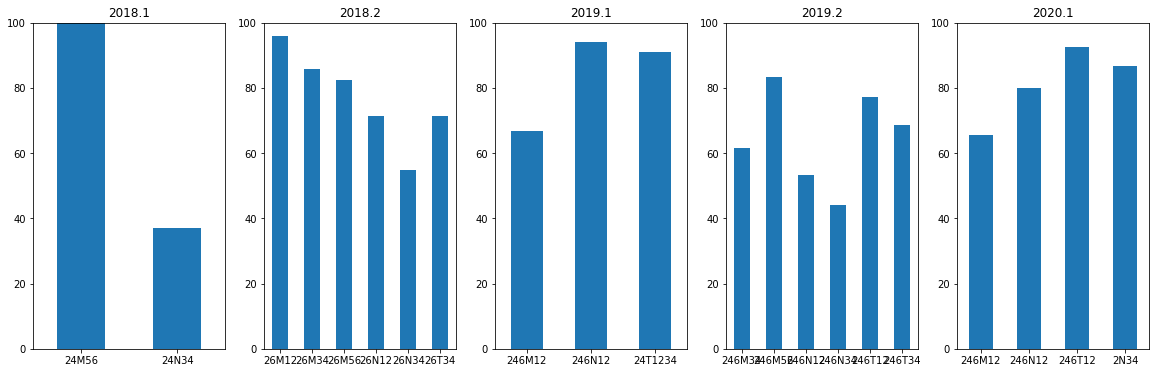

Média por semestre


<Figure size 288x288 with 0 Axes>

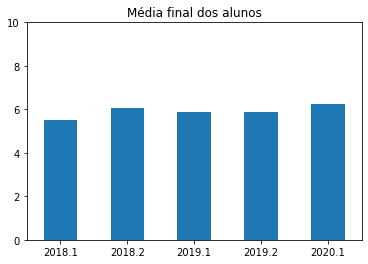

Média final por semestre


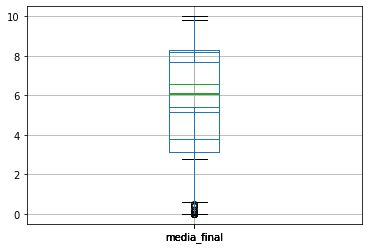

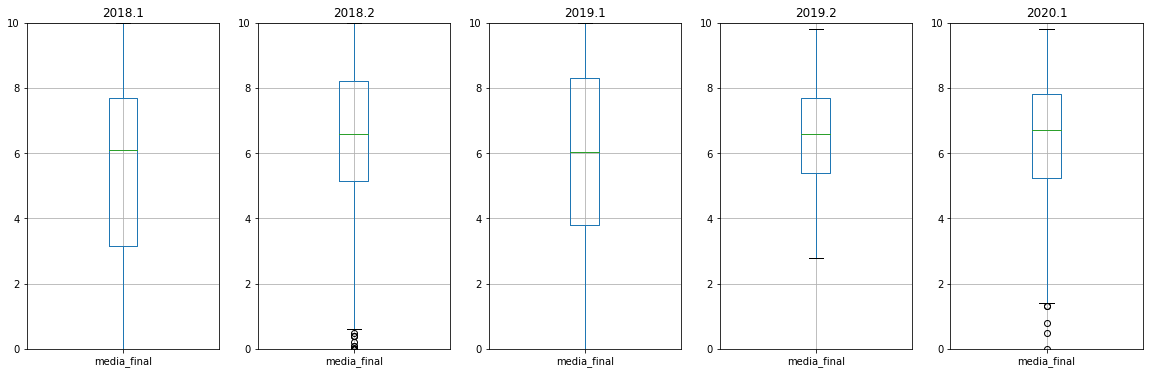

Distribuição das notas


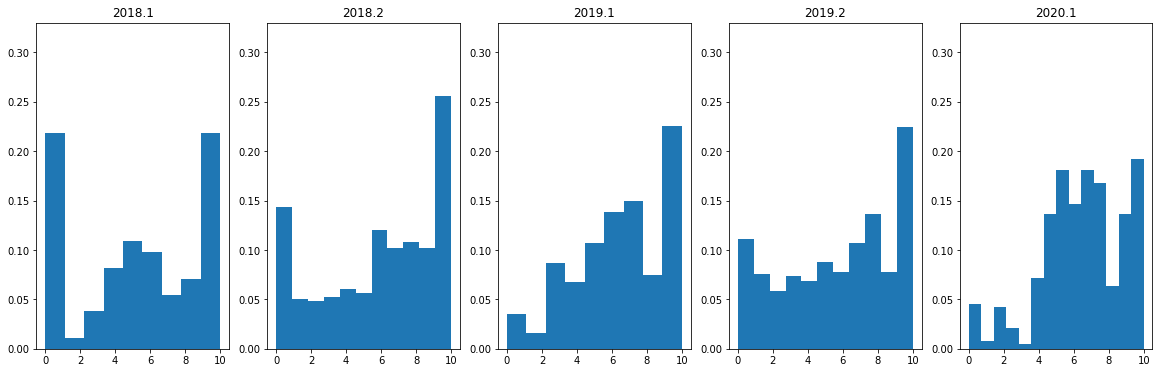

In [ ]:
%matplotlib inline 

def reduce(str, n):
  str_splited = str.split();
  str = '';
  for i in range(n):
    str += str_splited[i];
    if i+1 != n:
      str += ' ';
  return str;

def reduce_names(arr, n):
  n_arr = [None] * len(arr);
  for i in range(len(arr)):
    n_arr[i] = reduce(arr[i], n);
  return n_arr;

print('Aprovação/Reprovação por semestre')

fig = plt.figure(figsize=(20, 6));


plt.subplot(1, 5, 1);
plt.title('2018.1');
itp_2018_01.aprovado.value_counts().plot(kind='pie', labels=['Aprovado', 'Reprovado'], autopct='%.2f%%');
plt.ylabel('');

plt.subplot(1, 5, 2);
plt.title('2018.2');
itp_2018_02.aprovado.value_counts().plot(kind='pie', labels=['Aprovado', 'Reprovado'], autopct='%.2f%%');
plt.ylabel('');

plt.subplot(1, 5, 3);
plt.title('2019.1');
itp_2019_01.aprovado.value_counts().plot(kind='pie', labels=['Aprovado', 'Reprovado'], autopct='%.2f%%');
plt.ylabel('');

plt.subplot(1, 5, 4);
plt.title('2019.2');
itp_2019_02.aprovado.value_counts().plot(kind='pie', labels=['Aprovado', 'Reprovado'], autopct='%.2f%%');
plt.ylabel('');

plt.subplot(1, 5, 5);
plt.title('2020.1');
itp_2020_01.aprovado.value_counts().plot(kind='pie', labels=['Aprovado', 'Reprovado'], autopct='%.2f%%');
plt.ylabel('');

plt.show();

print('Aprovação por turma');

fig = plt.figure(figsize=(20, 6));

plt.subplot(1, 5, 1);
plt.title('2018.1');
aprovados_itp_2018_01_horario.aprovado.plot(kind='bar', width=0.5);
plt.xticks(range(len(aprovados_itp_2018_01_horario.index.values)), reduce_names(aprovados_itp_2018_01_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);


plt.subplot(1, 5, 2);
plt.title('2018.2');
aprovados_itp_2018_02_horario.aprovado.plot(kind='bar', width=0.5);
plt.xticks(range(len(aprovados_itp_2018_02_horario.index.values)), reduce_names(aprovados_itp_2018_02_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.subplot(1, 5, 3);
plt.title('2019.1');
aprovados_itp_2019_01_horario.aprovado.plot(kind='bar', width=0.5);
plt.xticks(range(len(aprovados_itp_2019_01_horario.index.values)), reduce_names(aprovados_itp_2019_01_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.subplot(1, 5, 4);
plt.title('2019.2');
aprovados_itp_2019_02_horario.aprovado.plot(kind='bar', width=0.5);
plt.xticks(range(len(aprovados_itp_2019_02_horario.index.values)), reduce_names(aprovados_itp_2019_02_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.subplot(1, 5, 5);
plt.title('2020.1');
aprovados_itp_2020_01_horario.aprovado.plot(kind='bar', width=0.5);
plt.xticks(range(len(aprovados_itp_2020_01_horario.index.values)), reduce_names(aprovados_itp_2020_01_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.show();
  
print('Média por semestre');

fig = plt.figure(figsize=(4, 4));
medias_por_semestre_frame = pd.DataFrame(medias_por_semestre);
medias_por_semestre_frame.plot(kind='bar', width=0.5)
plt.title('Média final dos alunos')
plt.xticks(range((len(medias_por_semestre))), ['2018.1', '2018.2', '2019.1', '2019.2', '2020.1'], rotation='horizontal');
#plt.xlabel('');
plt.legend().remove()
plt.ylim(0, 10);

plt.show();

pxx1 = graduacao_imd_2018_01[graduacao_imd_2018_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxx1 = pxx1.replace({',': '.'}, regex=True)
pxx1["media_final"] = pd.to_numeric(pxx1["media_final"])
pxx1.boxplot(column='media_final')

pxx4 = graduacao_imd_2018_02[graduacao_imd_2018_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxx4 = pxx4.replace({',': '.'}, regex=True)
pxx4["media_final"] = pd.to_numeric(pxx4["media_final"])
pxx4.boxplot(column='media_final')

pxx5 = graduacao_imd_2019_01[graduacao_imd_2019_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxx5 = pxx5.replace({',': '.'}, regex=True)
pxx5["media_final"] = pd.to_numeric(pxx5["media_final"])
pxx5.boxplot(column='media_final')

pxx2 = graduacao_imd_2019_02[graduacao_imd_2019_02.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxx2 = pxx2.replace({',': '.'}, regex=True)
pxx2["media_final"] = pd.to_numeric(pxx2["media_final"])
pxx2.boxplot(column='media_final')

pxx3 = graduacao_imd_2020_01[graduacao_imd_2020_01.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True]
pxx3 = pxx3.replace({',': '.'}, regex=True)
pxx3["media_final"] = pd.to_numeric(pxx3["media_final"])


print('Média final por semestre');

fig = plt.figure(figsize=(20, 6));

ax1 = plt.subplot(1, 5, 1);
fig.add_subplot(ax1)
pxx1.boxplot(column='media_final')
plt.title('2018.1');
#plt.xticks(range(len(pxx1.index.values)), reduce_names(aprovados_itp_2018_02_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 10);

ax4 = plt.subplot(1, 5, 2);
fig.add_subplot(ax4)
pxx4.boxplot(column='media_final')
plt.title('2018.2');
#plt.xticks(range(len(pxx1.index.values)), reduce_names(aprovados_itp_2018_02_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 10);

ax2 = plt.subplot(1, 5, 3);
fig.add_subplot(ax2)
pxx2.boxplot(column='media_final')
plt.title('2019.1');
#plt.xticks(range(len(aprovados_itp_2019_02_horario.index.values)), reduce_names(aprovados_itp_2019_02_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 10);

ax5 = plt.subplot(1, 5, 4);
fig.add_subplot(ax5)
pxx5.boxplot(column='media_final')
plt.title('2019.2');
#plt.xticks(range(len(aprovados_itp_2019_02_horario.index.values)), reduce_names(aprovados_itp_2019_02_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 10);

ax3 = plt.subplot(1, 5, 5);
fig.add_subplot(ax3)
pxx3.boxplot(column='media_final')
plt.title('2020.1');
#plt.xticks(range(len(aprovados_itp_2020_01_horario.index.values)), reduce_names(aprovados_itp_2020_01_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 10);

plt.show();

print('Distribuição das notas')
fig = plt.figure(figsize=(20, 6));


plt.subplot(1, 5, 1);
plt.title('2018.1');

px4 = graduacao_imd_2018_01.replace({',': '.'}, regex=True)
px4["nota"] = pd.to_numeric(px4["nota"])
px4["media_final"] = pd.to_numeric(px4["media_final"])
plt.hist(px4.dropna().nota, bins='auto', density=True)
plt.ylim(0, 0.33);


plt.subplot(1, 5, 2);
plt.title('2018.2');

px1 = graduacao_imd_2018_02.replace({',': '.'}, regex=True)
px1["nota"] = pd.to_numeric(px1["nota"])
px1["media_final"] = pd.to_numeric(px1["media_final"])
plt.hist(px1.dropna().nota, bins='auto', density=True)
plt.ylim(0, 0.33);


plt.subplot(1, 5, 3);

px5 = graduacao_imd_2019_01.replace({',': '.'}, regex=True)
px5["nota"] = pd.to_numeric(px5["nota"])
px5["media_final"] = pd.to_numeric(px5["media_final"])
plt.title('2019.1')
plt.hist(px5.dropna().nota, bins='auto', density=True)
plt.ylim(0, 0.33);


plt.subplot(1, 5, 4);

px2 = graduacao_imd_2019_02.replace({',': '.'}, regex=True)
px2["nota"] = pd.to_numeric(px2["nota"])
px2["media_final"] = pd.to_numeric(px2["media_final"])
plt.title('2019.2')
plt.hist(px2.dropna().nota, bins='auto', density=True)
plt.ylim(0, 0.33);

plt.subplot(1, 5, 5);
plt.title('2020.1');

px3 = graduacao_imd_2020_01.replace({',': '.'}, regex=True)
px3["nota"] = pd.to_numeric(px3["nota"])
px3["media_final"] = pd.to_numeric(px3["media_final"])
plt.title('2020.1')
plt.hist(px3.dropna().nota, bins='auto', density=True)
plt.ylim(0, 0.33);

plt.show()




In [ ]:
kmeansdb = base_final

dfkm = kmeansdb[['id_turma','discente', 'docente', 'unidade', 'nota', 'media_final','numero_total_faltas', 'aprovado', 'reposicao', 'reprovadoporfalta']]


def strhash_to_inthash(row):
  strhash = row['discente'];
  return hash(strhash) % 10**8;

def bool_to_int_aprovado(row):
  if row['aprovado'] == True:
    return 1;
  else:
    return 0;

def bool_to_int_reprovadoporfalta(row):
  if row['reprovadoporfalta'] == True:
    return 1;
  else:
    return 0;

def bool_to_int_reposicao(row):
  if row['reposicao'] == True:
    return 1;
  else:
    return 0;

def docentehash(row):
  strhash = row['docente'].split()[0];
  inthash = hash(strhash) % 10**1;
  return inthash;

def docentenome(row):
  return row['docente'].split()[0];


reduced_docente = dfkm.apply(docentenome, axis = 1)
dfkm["docente_nome"] = reduced_docente

#'''
inthashed_docente = dfkm.apply(docentehash, axis = 1)
dfkm["docente"] = inthashed_docente
#'''

inthashed_discente = dfkm.apply(strhash_to_inthash, axis = 1)
dfkm["discente"] = inthashed_discente 

aprovacao = dfkm.apply(bool_to_int_aprovado, axis = 1)
dfkm["aprovado"] = aprovacao 

reprovacaoporfalta = dfkm.apply(bool_to_int_reprovadoporfalta, axis = 1)
dfkm["reprovadoporfalta"] = reprovacaoporfalta 

reposicao = dfkm.apply(bool_to_int_reposicao, axis = 1)
dfkm["reposicao"] = reposicao 

#'''
normalized_docente=(dfkm.docente-dfkm.docente.min())/(dfkm.docente.max()-dfkm.docente.min())
dfkm["docente"] = normalized_docente
#'''

#'''
normalized_discente=(dfkm.discente-dfkm.discente.min())/(dfkm.discente.max()-dfkm.discente.min())
dfkm["discente"] = normalized_discente
#'''

#'''
normalized_unidade=(dfkm.unidade-dfkm.unidade.min())/(dfkm.unidade.max()-dfkm.unidade.min())
dfkm["unidade"] = normalized_unidade
#'''


normalized_nota=(dfkm.nota-dfkm.nota.min())/(dfkm.nota.max()-dfkm.nota.min())
dfkm["nota"] = normalized_nota

normalized_media_final=(dfkm.media_final-dfkm.media_final.min())/(dfkm.media_final.max()-dfkm.media_final.min())
dfkm["media_final"] = normalized_media_final

normalized_numero_total_faltas=(dfkm.numero_total_faltas-dfkm.numero_total_faltas.min())/(dfkm.numero_total_faltas.max()-dfkm.numero_total_faltas.min())
dfkm["numero_total_faltas"] = normalized_numero_total_faltas

dfkm.head()
#dfkm[dfkm["reprovadoporfalta"] == 1]
#dfkm[dfkm["aprovado"] == 1]
#dfkm[dfkm["media_final"] == 1]
#dfkm[dfkm["nota"] == 1]

# TODAS CARACTERISTICAS COM VALORES ENTE [0, 1] (inclusive)
# DISCENTE/DOCENTE COM HASH EM FLOAT

# @TODO: MAPEAR DOCENTES PARA 0.0 0.1 0.2 0.3


,id_turma,discente,docente,unidade,nota,media_final,numero_total_faltas,aprovado,reposicao,reprovadoporfalta,docente_nome
152699,7902,0.132741,1.0,0.0,0.45,0.72,0.147059,1,0,0,RAFAEL
152700,7902,0.132741,1.0,0.5,1.00,0.72,0.147059,1,0,0,RAFAEL
152701,7902,0.132741,1.0,1.0,0.70,0.72,0.147059,1,0,0,RAFAEL
152702,7902,0.473159,1.0,0.0,0.45,0.64,0.205882,1,0,0,RAFAEL
152703,7902,0.473159,1.0,0.5,0.76,0.64,0.205882,1,0,0,RAFAEL


In [ ]:
#dfkm.info()

dfkm.aprovado = dfkm.aprovado.astype(np.float64)
dfkm.reprovadoporfalta = dfkm.reprovadoporfalta.astype(np.float64)
dfkm.reposicao = dfkm.reposicao.astype(np.float64)

dfkm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 152699 to 1699991
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_turma             1965 non-null   uint16 
 1   discente             1965 non-null   float64
 2   docente              1965 non-null   float64
 3   unidade              1965 non-null   float64
 4   nota                 1965 non-null   float64
 5   media_final          1965 non-null   float64
 6   numero_total_faltas  1965 non-null   float64
 7   aprovado             1965 non-null   float64
 8   reposicao            1965 non-null   float64
 9   reprovadoporfalta    1965 non-null   float64
 10  docente_nome         1965 non-null   object 
dtypes: float64(9), object(1), uint16(1)
memory usage: 172.7+ KB


In [ ]:
dfkm.head()

,id_turma,discente,docente,unidade,nota,media_final,numero_total_faltas,aprovado,reposicao,reprovadoporfalta,docente_nome
152699,7902,0.132741,1.0,0.0,0.45,0.72,0.147059,1.0,0.0,0.0,RAFAEL
152700,7902,0.132741,1.0,0.5,1.00,0.72,0.147059,1.0,0.0,0.0,RAFAEL
152701,7902,0.132741,1.0,1.0,0.70,0.72,0.147059,1.0,0.0,0.0,RAFAEL
152702,7902,0.473159,1.0,0.0,0.45,0.64,0.205882,1.0,0.0,0.0,RAFAEL
152703,7902,0.473159,1.0,0.5,0.76,0.64,0.205882,1.0,0.0,0.0,RAFAEL


In [ ]:
describedb = dfkm
describedb = dfkm[['nota', 'media_final', 'numero_total_faltas', 'aprovado']]

describedb.describe()

,nota,media_final,numero_total_faltas,aprovado
count,1965.000000,1965.000000,1965.000000,1965.000000
mean,0.591318,0.608412,0.142232,0.746565
std,0.315708,0.258489,0.143274,0.435089
min,0.000000,0.000000,0.000000,0.000000
25%,0.370000,0.500000,0.000000,0.000000
50%,0.640000,0.640000,0.117647,1.000000
75%,0.860000,0.790000,0.264706,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
dfkm.to_csv("dfkm.csv")

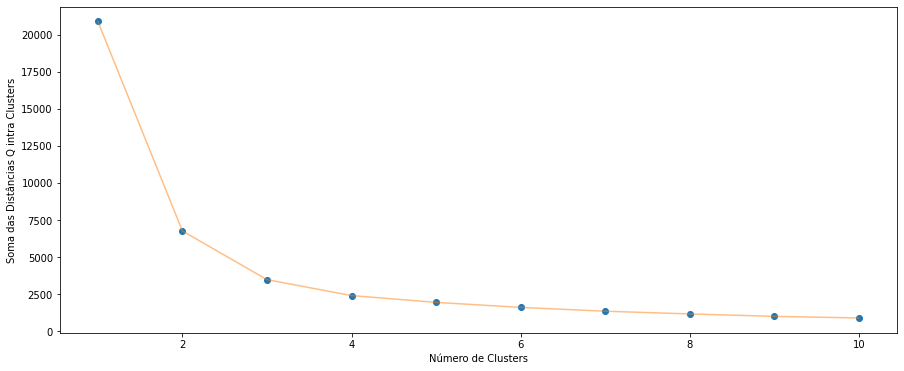

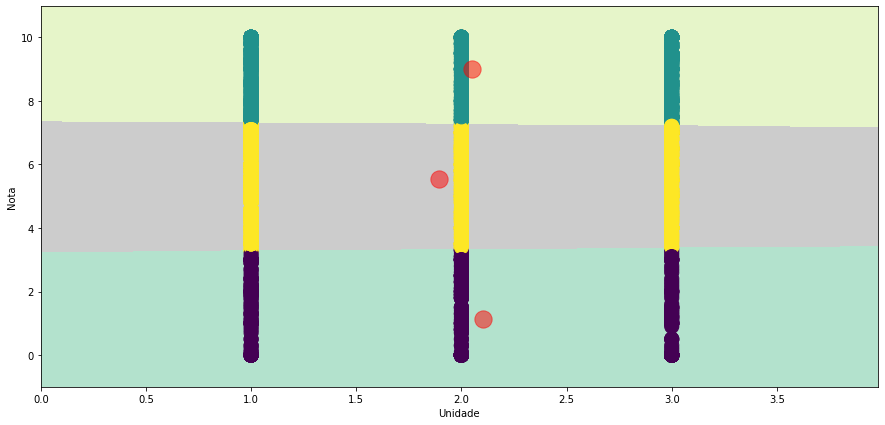

In [ ]:

# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
X2 = base_final[['unidade','nota']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'unidade' ,y = 'nota' , data = base_final , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Nota') , plt.xlabel('Unidade')
plt.show()

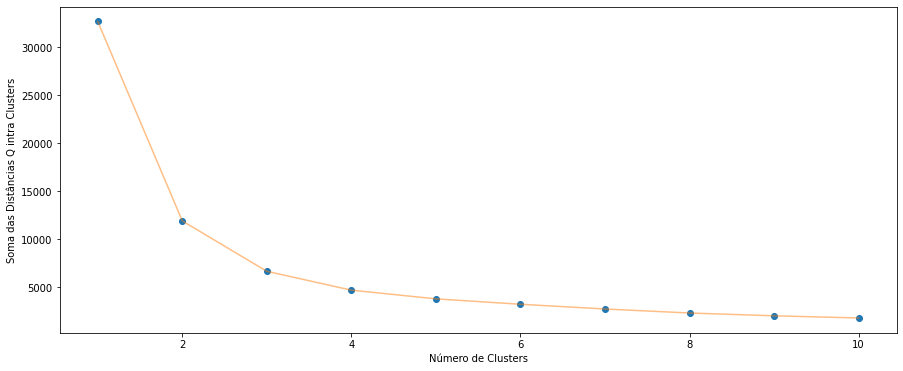

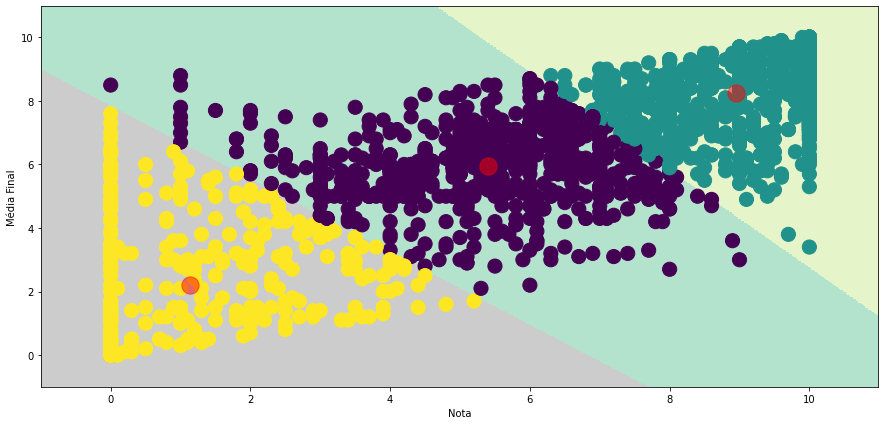

In [ ]:
X2 = base_final[['nota','media_final']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'nota' ,y = 'media_final' , data = base_final , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Média Final') , plt.xlabel('Nota')
plt.show()

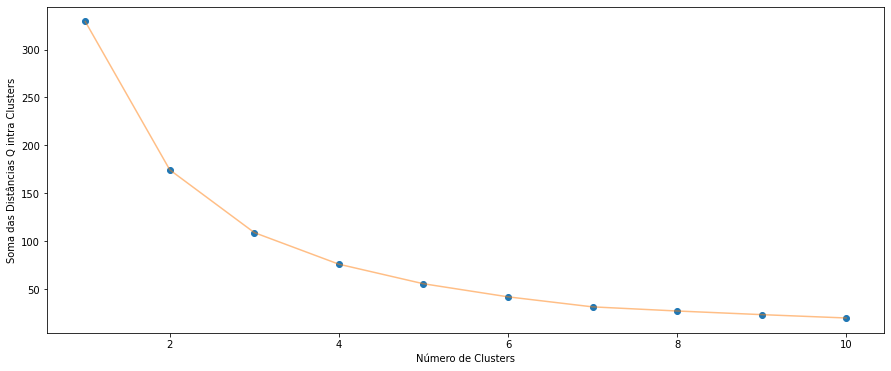

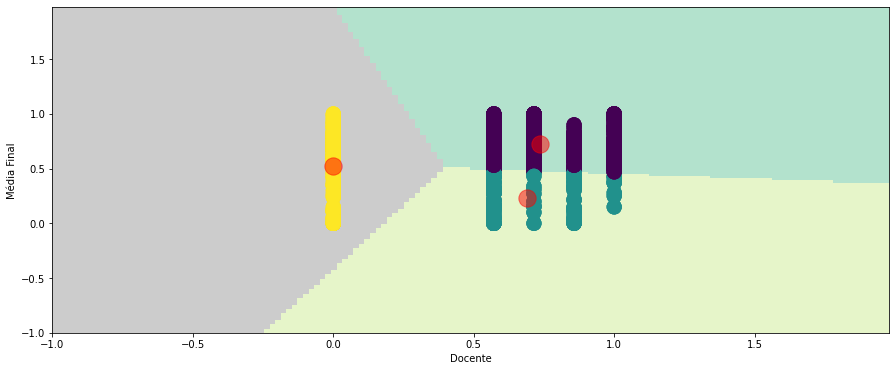

In [ ]:
X2 = dfkm[['docente','media_final']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 6) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'docente' ,y = 'media_final' , data = dfkm , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Média Final') , plt.xlabel('Docente')
plt.show()

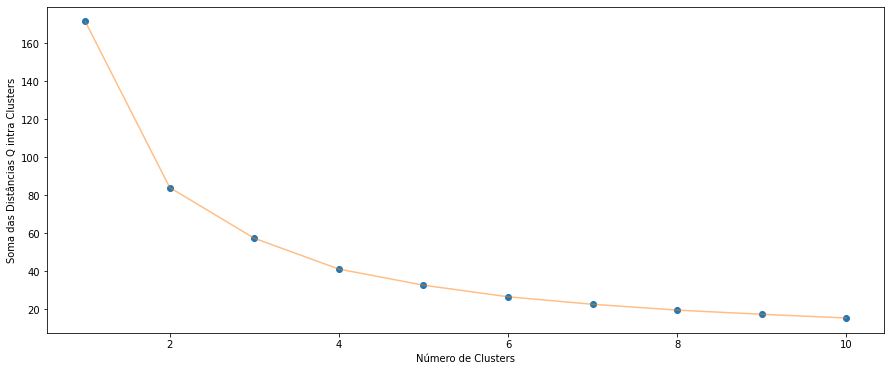

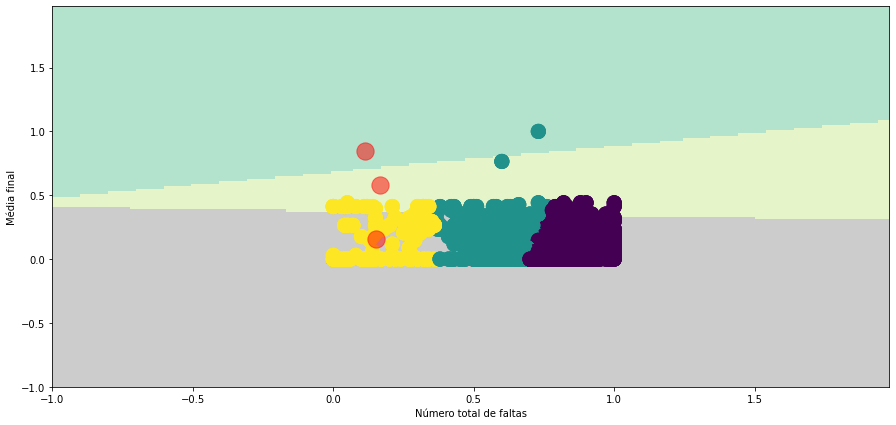

In [ ]:
# id_turma	discente	docente	unidade	nota	media_final	numero_total_faltas	aprovado	reposicao	reprovadoporfalta	docente_nome
X2 = dfkm[['numero_total_faltas','media_final']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'media_final' ,y = 'numero_total_faltas' , data = dfkm , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Média final') , plt.xlabel('Número total de faltas')
plt.show()

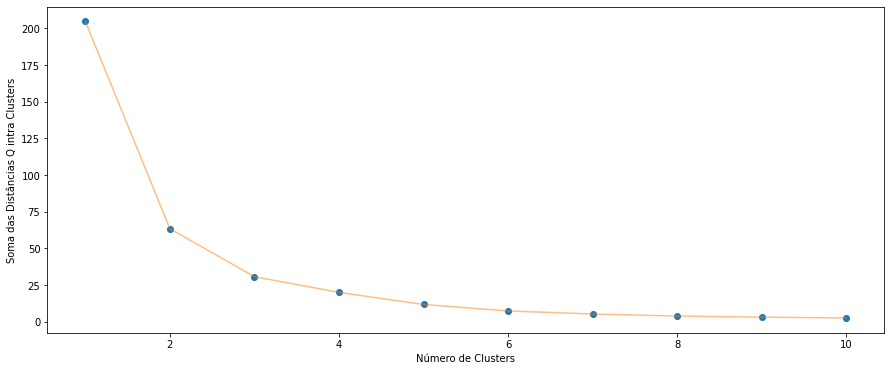

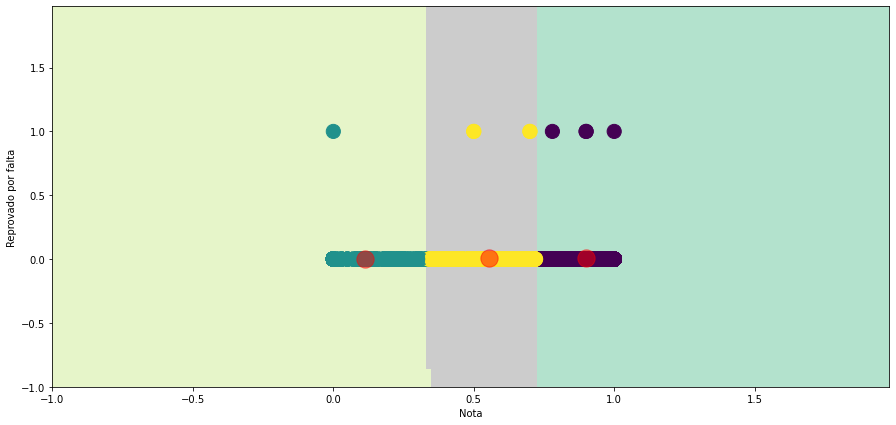

In [ ]:
X2 = dfkm[['nota','reprovadoporfalta']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'nota' ,y = 'reprovadoporfalta' , data = dfkm , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Reprovado por falta') , plt.xlabel('Nota')
plt.show()

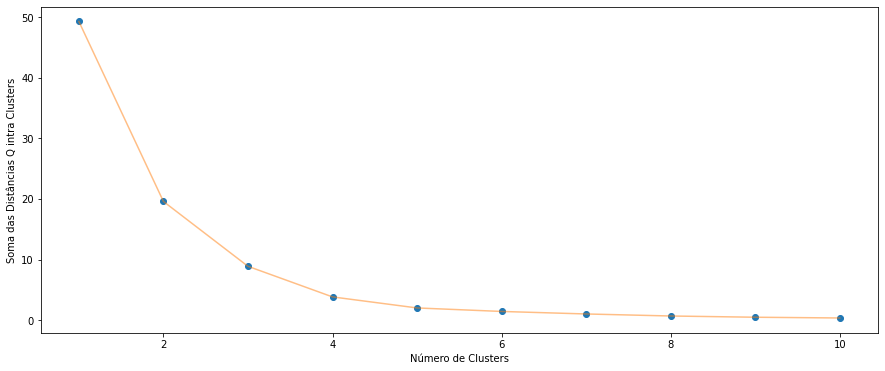

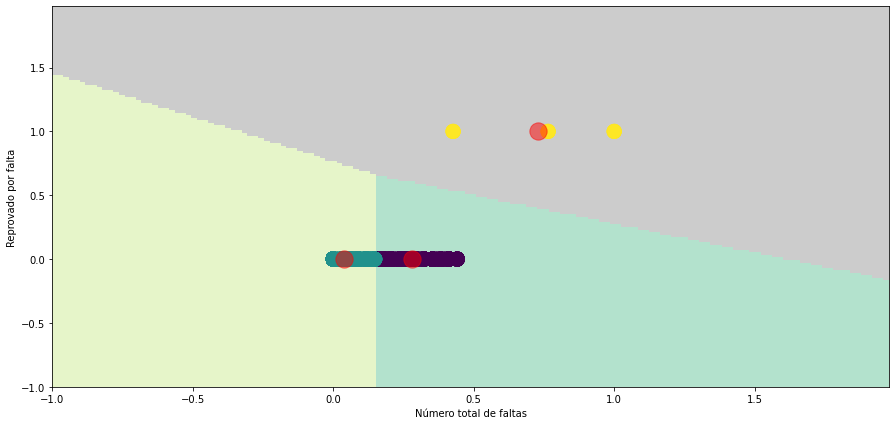

In [ ]:
# id_turma	discente	docente	unidade	nota	media_final	numero_total_faltas	aprovado	reposicao	reprovadoporfalta	docente_nome
X2 = dfkm[['numero_total_faltas','reprovadoporfalta']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'numero_total_faltas' ,y = 'reprovadoporfalta' , data = dfkm , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Reprovado por falta') , plt.xlabel('Número total de faltas')
plt.show()

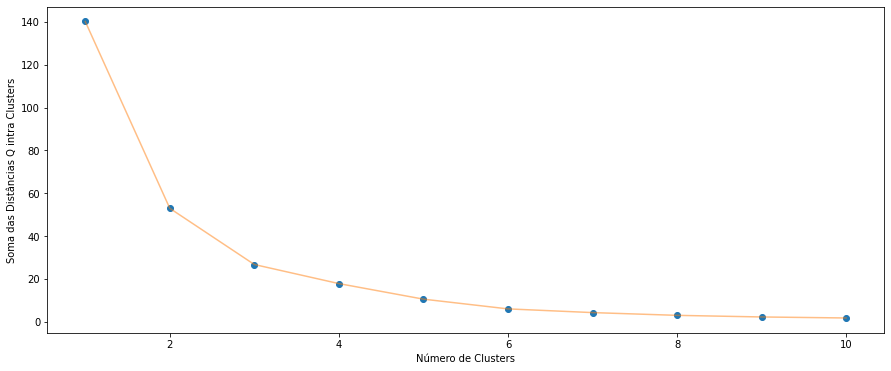

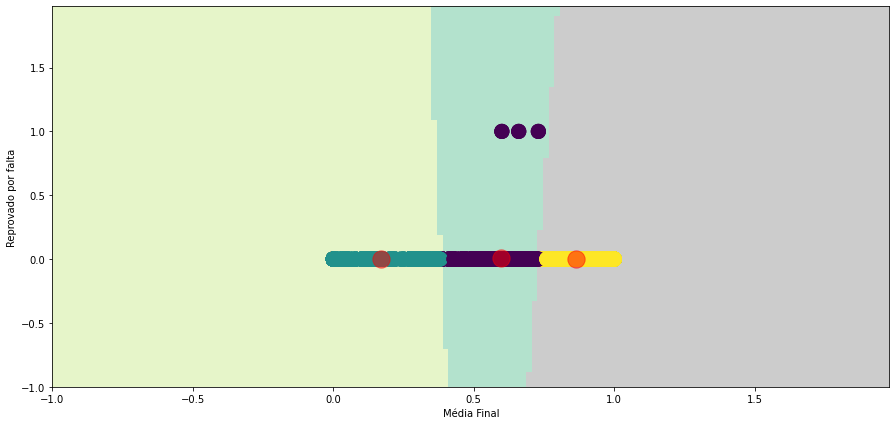

In [ ]:
# id_turma	discente	docente	unidade	nota	media_final	numero_total_faltas	aprovado	reposicao	reprovadoporfalta	docente_nome
X2 = dfkm[['media_final','reprovadoporfalta']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'media_final' ,y = 'reprovadoporfalta' , data = dfkm , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Reprovado por falta') , plt.xlabel('Média Final')
plt.show()